## Test Notebook for time domain feature extraction
 
Created: 08/04/2022  with v0.6


tested with v0.7: 23/01/2023    

In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
%matplotlib inline
import os,sys, math
import numpy as np
import librosa

import pyspch.sp as Sps
import pyspch.core as Spch
import pyspch.display as Spd

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

### Load a Data File and segmentation if available

In [3]:
root = 'https://homes.esat.kuleuven.be/~spchlab/data/'
#name = 'misc/bad_bead_booed'
name ='misc/b_8k'
name = 'misc/friendly'
#name = 'timit/si1027'

wavdata, sr = Spch.load_data(name+".wav",root=root)
seg = Spch.load_data(name+".phn",root=root)
# for timit files use these parameters
# seg = Spch.load_data(name+".phn",dt=.1/sr,root=root,xlat='timit61_41')

# Frame parameters and Spectral Processing
shift=0.01
length=0.030

spg = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift,n_mels=None,mode='dB')

In [4]:
rms,pitch,zcr = Sps.time_dom3(y=wavdata,sr=sr)

In [5]:
rms.shape, spg.shape, wavdata.shape

((1, 104), (129, 104), (8355,))

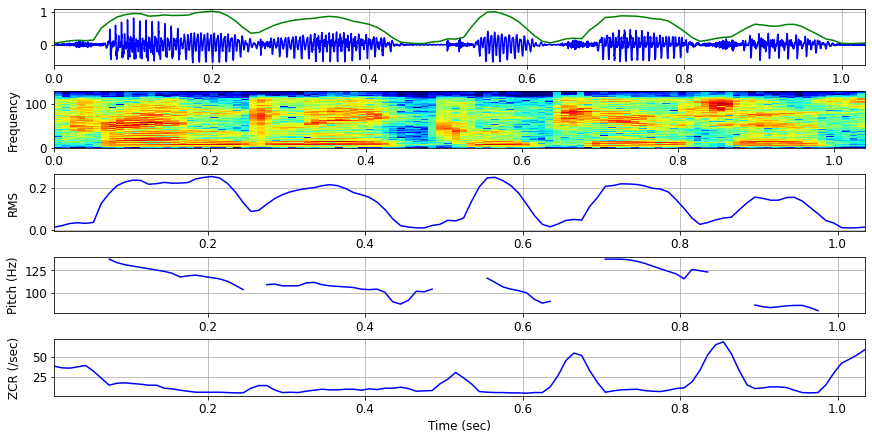

In [6]:
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,line_ftrs=[rms,pitch,zcr],dy=1,sample_rate=sr,
                     row_heights=[1,1,1,1,1])
fig.axes[2].set_ylabel("RMS")
fig.axes[3].set_ylabel("Pitch (Hz)")
fig.axes[4].set_ylabel("ZCR (/sec)")
fig.add_line_plot(4*rms,dx=0.01,iax=0)
display(fig)

In [7]:
fig.axes[1].get_xlim(), fig.axes[2].get_xlim(), fig.axes[0].get_xlim()

((0.0, 1.04), (0.005, 1.035), (0.0, 1.03))

In [8]:
rms10,_,_ = Sps.time_dom3(y=wavdata,sr=sr,length=0.01)
rms100,_,_ = Sps.time_dom3(y=wavdata,sr=sr,length=0.1)

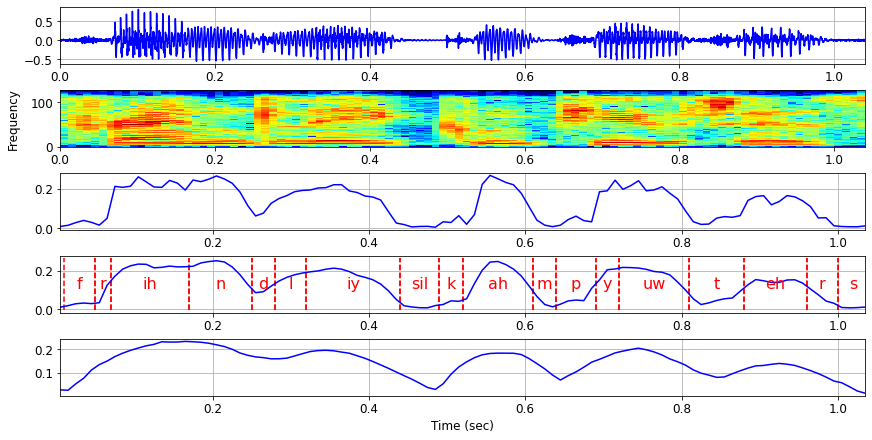

In [9]:
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,  line_ftrs=[rms10,rms,rms100],dy=1,sample_rate=sr,
                     row_heights=[1,1,1,1,1])
fig.add_seg_plot(seg,iax=3)
fig

## librosa rms computations
- using waveform or spectrum,  spectrum has preemphasis and windowing applied
- the center = True (default) makes that it has a frame_shift//2 offset (ahead) vs. pyspch

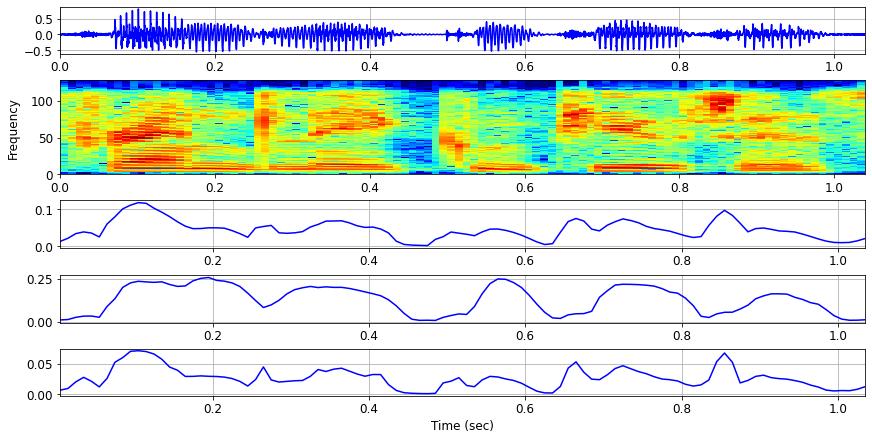

In [10]:
rms,pitch,zcr = Sps.time_dom3(y=wavdata,sr=sr,preemp=.95)
rmsy = librosa.feature.rms(y=wavdata,frame_length=240,hop_length=80)
rmsS = librosa.feature.rms(S=Sps.set_mode(spg,'dB','magnitude'),frame_length=256)
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,  line_ftrs=[rms,rmsy,rmsS],shift=shift,dy=1,sample_rate=sr,
                     row_heights=[1,2,1,1,1])
fig

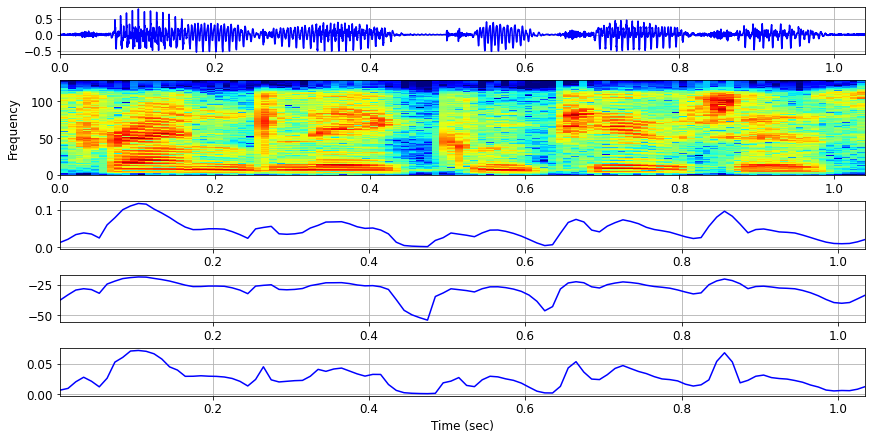

In [11]:
en = Sps.energy(y=wavdata,sr=sr,preemp=.95,mode='dB')
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,  line_ftrs=[rms,en,rmsS],shift=shift,dy=1,sample_rate=sr,
                     row_heights=[1,2,1,1,1])
fig

### Time Domain Features with a short frame shift (5msec) and frame lengths in range of 5-100 msec

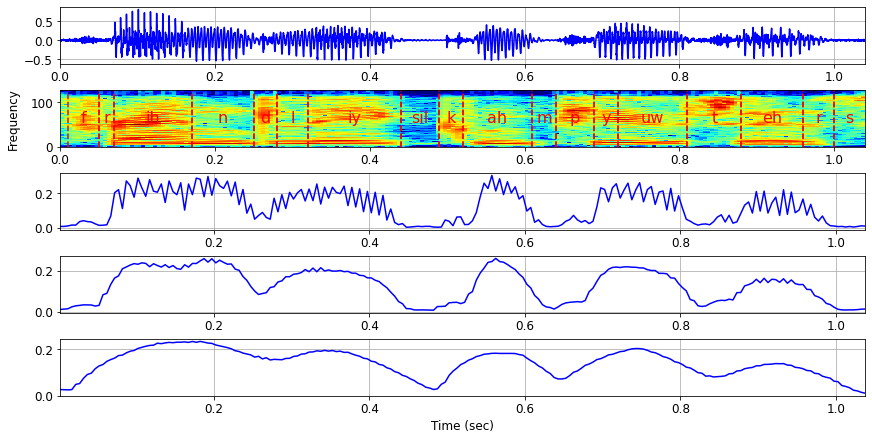

In [12]:
shift = 0.005
length = 0.03
spg = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift,n_mels=None,mode='dB')
rms,_,_ = Sps.time_dom3(y=wavdata,sr=sr,shift=shift,length=0.03)
rms1,_,_ = Sps.time_dom3(y=wavdata,sr=sr,shift=shift,length=0.005)
rms2,_,_ = Sps.time_dom3(y=wavdata,sr=sr,shift=shift,length=0.1)
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,  line_ftrs=[rms1,rms,rms2],shift=shift,dy=1,sample_rate=sr,
                     row_heights=[1,1,1,1,1])
fig.add_seg_plot(seg,iax=1)
fig